# Project Phase One

* Student name: Edwin Cheruiyot
* Course: DS Full time


## Microsoft Movie Studio Analysis

### 1. Business understanding 

### a) Introduction

Movie studios play a vital role in the entertainment industry by producing and distributing films to audiences both locally and  worldwide. Movies are the driving force behind the creation, financing, marketing,distribution of movies and shaping the global cinematic landscape. Understanding the workings and dynamics of movie studios is essential for analyzing the industry, identifying trends, and predicting future developments. 

Movie studio are committed to fostering creativity, nurturing talent, and embracing diversity in all aspects in the entertaining industry and supporting emerging filmmakers, telling diverse stories that reflect the richness of our world, and contributing positively to the art of cinema.


### b) Problem Statement 

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Main Objective 

The xplore the types of films that have been performing exceptionaly well in the box office

### Specific Objectives

* To extra

### c) Experimental Design

1. Data Collection
2. Read and check the data
3. Cleaning the data
4. Exploratory Data Analysis
5. Conclusions and Recommendations

### d) Data Understanding

The data was collected from various locations, the different files have different formats. Some are CSV or TSV files that can be opened using spreadsheet software or pd.read_csv, while the data from IMDB is located in a SQLite database. 

The data includes different information concerning the movies ranging from the title, genres, average-rating, e.t.c

Analyzing dataset will determine what contributes to the "success" of a movie. In this analysis, I will define analysis in financial terms basing the success of a movie on the amount of money it earns in comparison to the budget.

### 2 Importing Libraries

In [28]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pandasql import sqldf
import csv

### 3 Loading the Data

In [29]:
#loading the tn.movie_budgets data
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [30]:
#loading the bom.movie_gross data
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [31]:
# loading the title.basics.csv
movie_basics = pd.read_csv('title.basics.csv')
movie_basics.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [32]:
# connecting the im.db database 
#reading data from the tables movie_basics and movie_ratings
conn = sqlite3.connect('im.db')

ms_movies = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id);
""", conn)
ms_movies.head(10)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [33]:
#loading  of the title.ratings.csv  

movie_ratings = pd.read_csv(
                            'title.ratings.csv'
    )
movie_ratings.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [34]:
# we now join tn_mv_budgets and im_movies datasets on the movie titles 

ms_movies = movie_basics.set_index("tconst").join(movie_ratings.set_index("tconst"),
                                                   how="inner")
ms_movies = ms_movies.reset_index().rename(columns={"index": "tconst"})
ms_movies.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [35]:
# joining the movie_basics and movie_ratings
movies = ms_movies.set_index('primary_title').join(tn_movie_budgets.set_index("movie"), how="inner")
movies.head()

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
primary_title,,,,,,,,,,,,
#Horror,tt3526286,#Horror,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
10 Days in a Madhouse,tt3453052,10 Days in a Madhouse,2015,111.0,Drama,6.7,1114,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
12 Rounds,tt3517850,12 Rounds,2017,NaN,"Action,Drama,Romance",8.1,11,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"


In [43]:
movies = ms_movies.set_index('primary_title').join(tn_movie_budgets.set_index("movie"), how="inner")
movies.head()

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
primary_title,,,,,,,,,,,,
#Horror,tt3526286,#Horror,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,"Nov 20, 2015","$1,500,000",$0,$0
10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
10 Days in a Madhouse,tt3453052,10 Days in a Madhouse,2015,111.0,Drama,6.7,1114,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
12 Rounds,tt3517850,12 Rounds,2017,NaN,"Action,Drama,Romance",8.1,11,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"


In [44]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2875 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2875 non-null   object 
 1   original_title     2875 non-null   object 
 2   start_year         2875 non-null   int64  
 3   runtime_minutes    2757 non-null   float64
 4   genres             2867 non-null   object 
 5   averagerating      2875 non-null   float64
 6   numvotes           2875 non-null   int64  
 7   id                 2875 non-null   int64  
 8   release_date       2875 non-null   object 
 9   production_budget  2875 non-null   object 
 10  domestic_gross     2875 non-null   object 
 11  worldwide_gross    2875 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 292.0+ KB


### 4 Data Wrangling


### Dropping columns

There are several datasets and in this step some irrelevant dataset will be dropped and others joined



In [38]:
#dropping columns
cols_to_remove = ["id", "runtime_minutes", "start_year", "original_title"]
movies = movies.drop(cols_to_remove, axis=1)

In [39]:
##Updating the index name of the "movies" DataFrame to "movie"
movies.index.name = "movie"
movies.reset_index(inplace=True)
movies.head()

,movie,tconst,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,tt3526286,"Crime,Drama,Horror",3.0,3092,"Nov 20, 2015","$1,500,000",$0,$0
1,10 Cloverfield Lane,tt1179933,"Drama,Horror,Mystery",7.2,260383,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422"
2,10 Days in a Madhouse,tt3453052,Drama,6.7,1114,"Nov 11, 2015","$12,000,000","$14,616","$14,616"
3,12 Rounds,tt3517850,"Action,Drama,Romance",8.1,11,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648"
4,12 Strong,tt1413492,"Action,Drama,History",6.6,50155,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378"


In [45]:
#summary of our data
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2875 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2875 non-null   object 
 1   original_title     2875 non-null   object 
 2   start_year         2875 non-null   int64  
 3   runtime_minutes    2757 non-null   float64
 4   genres             2867 non-null   object 
 5   averagerating      2875 non-null   float64
 6   numvotes           2875 non-null   int64  
 7   id                 2875 non-null   int64  
 8   release_date       2875 non-null   object 
 9   production_budget  2875 non-null   object 
 10  domestic_gross     2875 non-null   object 
 11  worldwide_gross    2875 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 292.0+ KB


In [41]:
 #Dropping rows from the Dataset
movies = movies.dropna(inplace=True)   

In [48]:
#converting budget columns to an Integer data type
movies.iloc[:, 6:] = movies.iloc[:, 6:].applymap(lambda x: int(x.replace(",", "").strip("$")) if isinstance(x, str) else x)
movies.head()

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
primary_title,,,,,,,,,,,,
#Horror,tt3526286,#Horror,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,2015-11-20 00:00:00,1500000,0,0
10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,54,2016-03-11 00:00:00,5000000,72082999,108286422
10 Days in a Madhouse,tt3453052,10 Days in a Madhouse,2015,111.0,Drama,6.7,1114,48,2015-11-11 00:00:00,12000000,14616,14616
12 Rounds,tt3517850,12 Rounds,2017,NaN,"Action,Drama,Romance",8.1,11,37,2009-03-27 00:00:00,20000000,12234694,17306648
12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,64,2018-01-19 00:00:00,35000000,45819713,71118378


In [46]:
#Converting release_date to Dates
movies.loc[:, "release_date"] = pd.to_datetime(movies.loc[:, "release_date"])
movies.head()

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
primary_title,,,,,,,,,,,,
#Horror,tt3526286,#Horror,2015,101.0,"Crime,Drama,Horror",3.0,3092,16,2015-11-20 00:00:00,"$1,500,000",$0,$0
10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,54,2016-03-11 00:00:00,"$5,000,000","$72,082,999","$108,286,422"
10 Days in a Madhouse,tt3453052,10 Days in a Madhouse,2015,111.0,Drama,6.7,1114,48,2015-11-11 00:00:00,"$12,000,000","$14,616","$14,616"
12 Rounds,tt3517850,12 Rounds,2017,NaN,"Action,Drama,Romance",8.1,11,37,2009-03-27 00:00:00,"$20,000,000","$12,234,694","$17,306,648"
12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,64,2018-01-19 00:00:00,"$35,000,000","$45,819,713","$71,118,378"


### Checking the duplicates in the data


In [50]:
#checking for duplicates in our dataset
set(list(movies.duplicated(subset="tconst")))

{False, True}

In [52]:
#Dropping duplicates
movies.drop_duplicates(subset="tconst", inplace=True)

In [53]:
#checking the number of rows left after dropping the duplicated rows
len(movies)

2752

### DATA ANALYSIS / VISUALIZATION

In our analysis, we define a successful movie based on its worldwide gross, which combines the total domestic and foreign income. Specifically, a movie is considered successful if its worldwide gross is at least twice the budget. This criterion ensures that the movie generates significant revenue compared to its production costs.

In [54]:
#retrieving succesful movies from our dataset
success_movies = movies.loc[((movies.worldwide_gross // movies.production_budget) >= 2)]
success_movies.head()

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
primary_title,,,,,,,,,,,,
10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,54,2016-03-11 00:00:00,5000000,72082999,108286422
12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,64,2018-01-19 00:00:00,35000000,45819713,71118378
12 Years a Slave,tt2024544,12 Years a Slave,2013,134.0,"Biography,Drama,History",8.1,577301,18,2013-10-18 00:00:00,20000000,56671993,181025343
127 Hours,tt1542344,127 Hours,2010,94.0,"Adventure,Biography,Drama",7.6,323949,6,2010-11-05 00:00:00,18000000,18335230,60217171
2 Guns,tt1272878,2 Guns,2013,109.0,"Action,Comedy,Crime",6.7,182025,39,2013-08-02 00:00:00,61000000,75612460,132493015


Let us order the data

In [57]:
#getting a ratio which will be used in ordering our data
success_movies = success_movies.join(movies.apply(lambda row: round(row["worldwide_gross"] / row["production_budget"]) if pd.notnull(row["worldwide_gross"]) and pd.notnull(row["production_budget"]) else None, axis=1).rename("income_ratio"))
success_movies.head()

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,income_ratio
primary_title,,,,,,,,,,,,,
10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,54,2016-03-11 00:00:00,5000000,72082999,108286422,22
12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,64,2018-01-19 00:00:00,35000000,45819713,71118378,2
12 Years a Slave,tt2024544,12 Years a Slave,2013,134.0,"Biography,Drama,History",8.1,577301,18,2013-10-18 00:00:00,20000000,56671993,181025343,9
127 Hours,tt1542344,127 Hours,2010,94.0,"Adventure,Biography,Drama",7.6,323949,6,2010-11-05 00:00:00,18000000,18335230,60217171,3
2 Guns,tt1272878,2 Guns,2013,109.0,"Action,Comedy,Crime",6.7,182025,39,2013-08-02 00:00:00,61000000,75612460,132493015,2


In [58]:
#ordering the data
success_movies = success_movies.sort_values("income_ratio", ascending=False)
success_movies.head()

,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,income_ratio
primary_title,,,,,,,,,,,,,
The Gallows,tt2309260,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,17763,80,2015-07-10 00:00:00,100000,22764410,41656474,417
Bambi,tt2668120,Bambi,2013,58.0,"Biography,Documentary",7.0,101,47,1942-08-13 00:00:00,858000,102797000,268000000,312
Rocky,tt9430578,Rocky,2019,NaN,"Action,Drama,Romance",6.4,5,11,1976-11-21 00:00:00,1000000,117235147,225000000,225
Rocky,tt3080284,Rocky,2013,136.0,"Action,Comedy,Drama",6.1,46,11,1976-11-21 00:00:00,1000000,117235147,225000000,225
Rocky,tt3080284,Rocky,2013,136.0,"Action,Comedy,Drama",6.1,46,11,1976-11-21 00:00:00,1000000,117235147,225000000,225


Let's plot the top most succesful genres

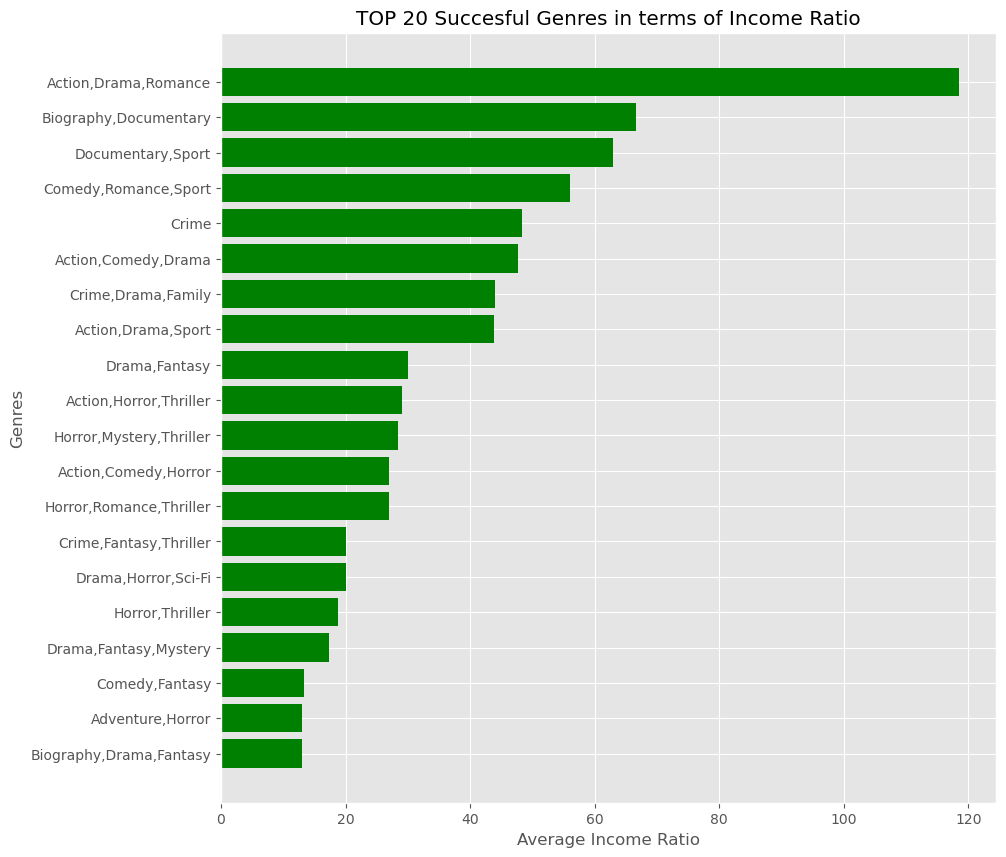

In [59]:
#A plot of the top 20 most succesful genres in terms of income ratio
genres_income = success_movies.groupby("genres")["income_ratio"].mean().sort_values()[-20:]

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (10,10))

ax.barh(genres_income.index, genres_income.values, color = "green")

ax.set(xlabel = "Average Income Ratio", ylabel = "Genres", 
       title = "TOP 20 Succesful Genres in terms of Income Ratio");

Based on the above analysis plot, the top 20 most successful genres in terms of average income ratio are Action, Drama, and Romance. These genres consistently generated the highest average income compared to other genres.

In [63]:
#most common genres in succesful movies.
success_genres = []
for genre in list(success_movies.genres):
    if isinstance(genre, str):
        success_genres.extend(genre.split(","))
        
success_genres = pd.Series(success_genres).value_counts().sort_values() 

#top 5 genres
top_5_sg = success_genres[-5:]

In [65]:
#The Most common genres in the TOP 100 most succesful movies
genres = list(success_movies.genres)[:100]
income_ratio = list(success_movies.income_ratio.astype(int))[:100]

top_100_genres = []
for gen in genres:
    top_100_genres.extend(gen.split(","))
top_100_genres = pd.Series(top_100_genres).value_counts().sort_values()

#top 5 genres
top_5_g = top_100_genres[-5:]

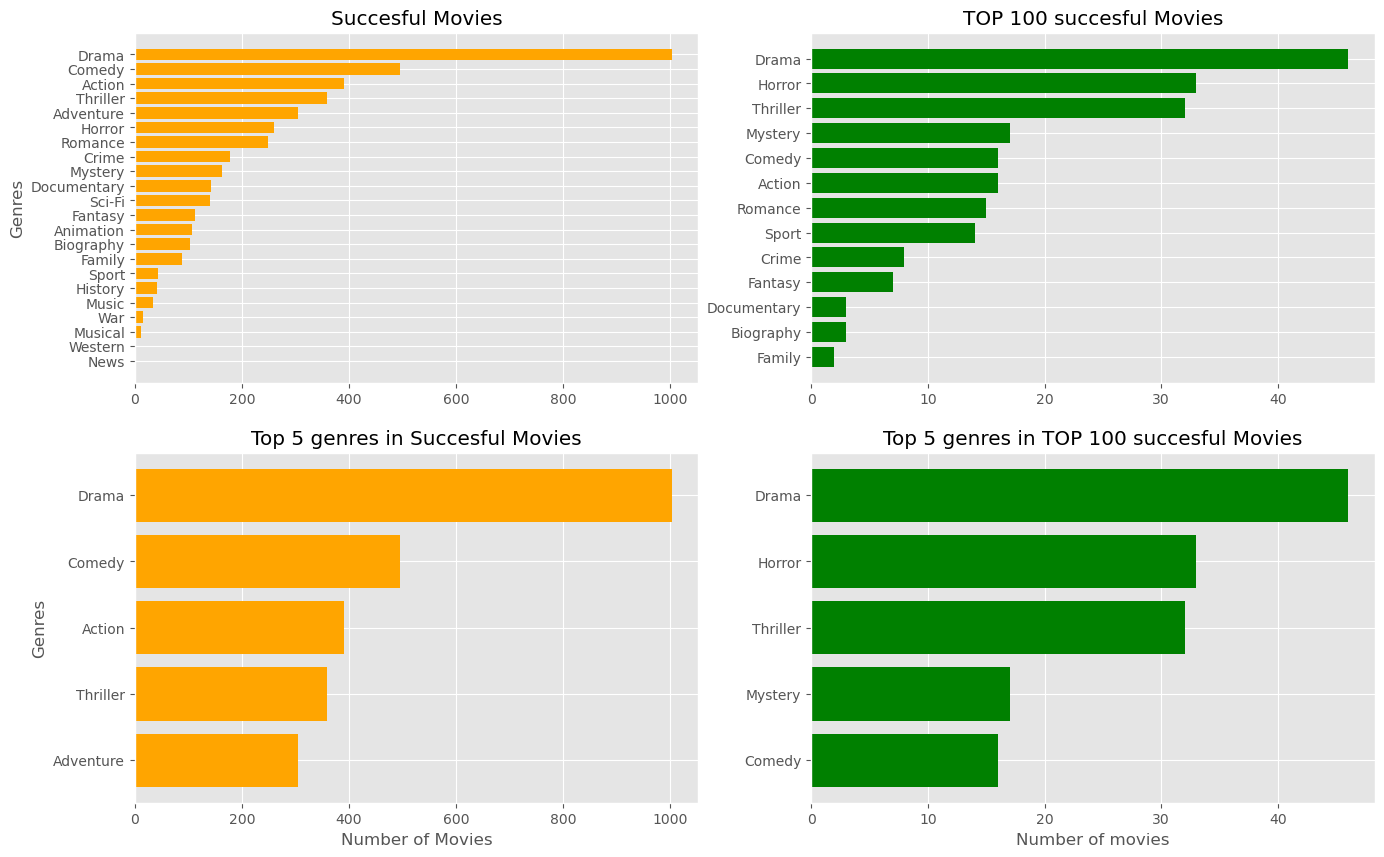

In [67]:
#plotting most common genres in Top 100 and the succesful movies
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(figsize=(16,10), ncols=2, nrows=2)

ax1.barh(success_genres.index, success_genres.values, color = "orange")
ax2.barh(top_100_genres.index, top_100_genres.values, color = "green")
ax3.barh(top_5_sg.index, top_5_sg.values, color = "orange")
ax4.barh(top_5_g.index, top_5_g.values, color = "green")

ax1.set(ylabel = "Genres",
          title = "Succesful Movies")
ax2.set(title = "TOP 100 succesful Movies")

ax3.set(xlabel = "Number of Movies", ylabel = "Genres",
          title = "Top 5 genres in Succesful Movies")
ax4.set(xlabel = "Number of movies",
          title = "Top 5 genres in TOP 100 succesful Movies");

From the above diagrams, we can observe some trends and insights regarding the genres in successful movies:

Drama Genre: The genre of Drama is the most common among the most successful movies. It appears frequently in both the overall successful movies and the top 100 successful movies. This suggests that movies with dramatic elements have a higher likelihood of achieving success.

Thriller and Comedy Genres: The genres of Thriller and Comedy also exhibit a significant presence in both the overall successful movies and the top 100 successful movies. This indicates that movies with thrilling and comedic elements have a good chance of being successful.

Genre Consistency: The fact that certain genres like Drama, Thriller, and Comedy appear in both graphs suggests a trend in the genres that are commonly found in successful movies. These genres seem to resonate well with audiences and have a broad appeal.

Overall, the data indicates that genres like Drama, Thriller, and Comedy have a higher probability of success in the movie industry. Filmmakers may consider incorporating elements from these genres into their movies to increase their chances of achieving success.

### Calculating the mean, median and Standard Deviation

In [68]:
#Calculating the mean, median, standard deviation, number of votes
print("mean: ", success_movies.numvotes.mean())
print("median: ", success_movies.numvotes.median())
print("standard dev: ", success_movies.numvotes.std())

mean:  88363.31085949563
median:  5788.0
standard dev:  160087.02129134082


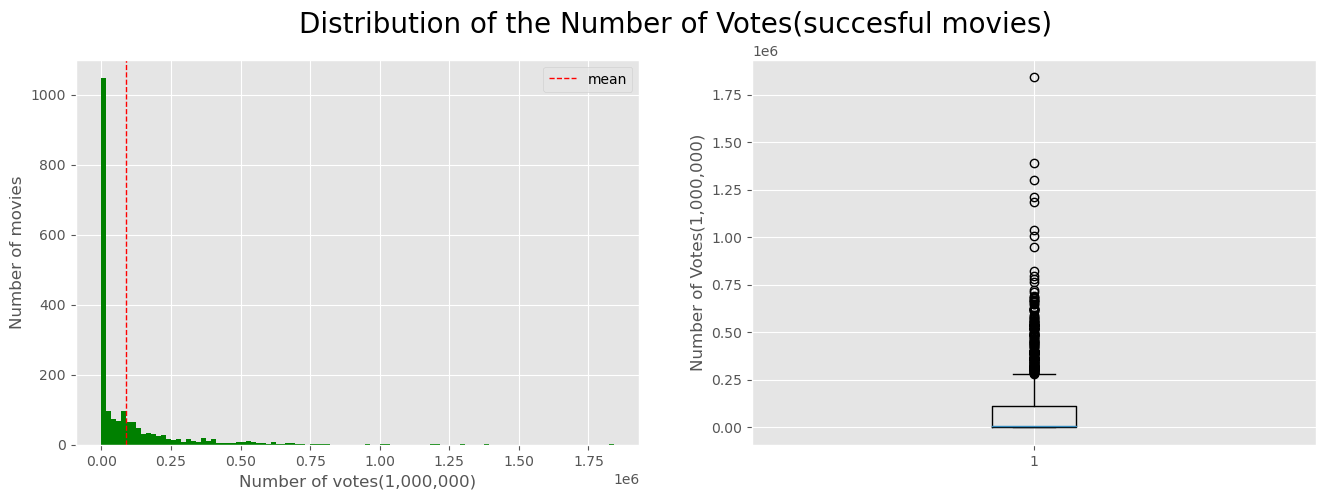

In [85]:
#Distribution of the number of votes.
fig, ax = plt.subplots(figsize = (16,5), ncols=2)

ax[0].hist(success_movies.numvotes, bins="auto", color= "green")
ax[1].boxplot(success_movies.numvotes)

ax[0].axvline(success_movies.numvotes.mean(), c = "red", lw = 1, ls = "--")
ax[0].set(xlabel = "Number of votes(1,000,000)", ylabel = "Number of movies")
ax[1].set(ylabel = "Number of Votes(1,000,000)")

ax[0].legend(["mean"])

fig.suptitle("Distribution of the Number of Votes(succesful movies)", fontsize = 20);

The number of votes in successful movies shows a skewed distribution, a high variance, and no specific standard number of votes required for determining the average rating. Filmmakers and viewers should consider that the number of votes alone may not be a reliable indicator of a movie's success or quality.

### Number of votes and the average rating.

In [72]:
#correlation  between number of votes and average rating
np.corrcoef(success_movies.averagerating, success_movies.numvotes)[0][1]

0.3291265134373031

### ploting the scatter plot

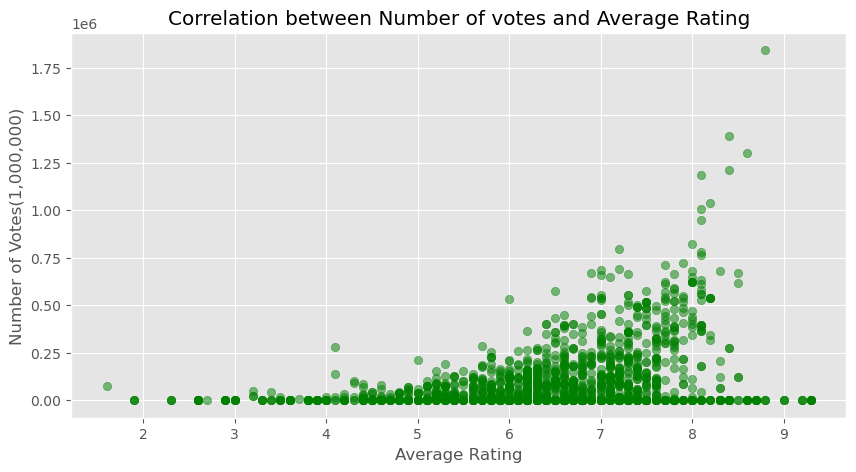

In [73]:
#plotting a scatter matrix to display the relationship
fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(success_movies.averagerating, success_movies.numvotes, color = "green",
           alpha=0.5)
ax.set(xlabel = "Average Rating", ylabel = "Number of Votes(1,000,000)",
       title = "Correlation between Number of votes and Average Rating");

Based on the correlation coefficient of 0.329, there is a low positive correlation between the number of votes and the average rating of movies. This indicates that there is a slight relationship between these two variables, but the correlation is not strong.

From the observations, it can be inferred that while there is no specific standard required number of votes for determining the average rating of movies, a higher number of votes tends to have a slight positive effect on the average rating. This suggests that movies with a larger number of votes are more likely to have a higher average rating, indicating a positive reception from viewers.

### Average rating and the income ratio

In [74]:
#Correlation inbetween the Average rating and the income ratio
np.corrcoef(success_movies.averagerating, success_movies.income_ratio)[0][1]

-0.07829544522718213

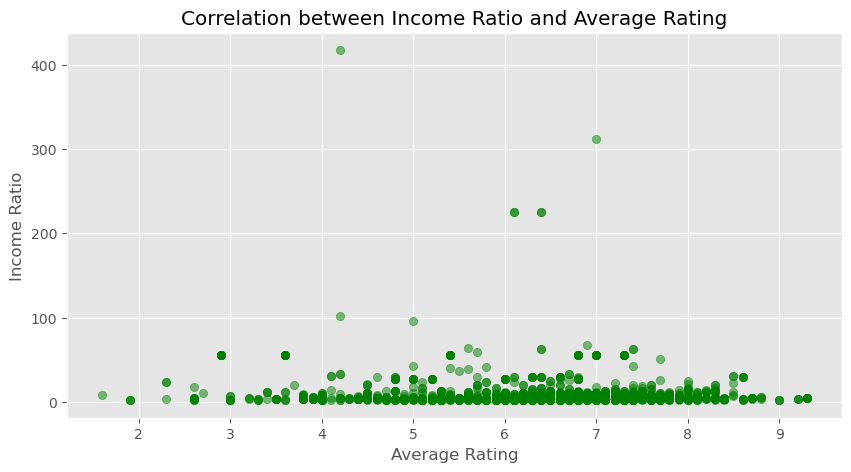

In [75]:
fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(success_movies.averagerating, success_movies.income_ratio, color = "green",
           alpha=0.5)
ax.set(xlabel = "Average Rating", ylabel = "Income Ratio",
       title = "Correlation between Income Ratio and Average Rating");

 The correlation (-0.07829) is very close to 0 and we can conclude that there is no correlation. 
From the observations, we can infer that the average rating of a movie does not have a significant impact on its success in terms of the income generated. This means that a movie with a high average rating does not necessarily guarantee higher financial success, and vice versa. Other factors such as marketing, genre, star power, release timing, and audience preferences may play a more crucial role in determining a movie's financial success.

In [78]:
#Selecting the month release_dates and the average income ratio per month
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

months_income = pysqldf("""
                        SELECT AVG(income_ratio) avg_incomeRatio,
                               strftime("%m", release_date) release_months
                        FROM success_movies
                        GROUP BY release_months
                        ORDER BY avg_incomeRatio DESC
                        """)
months_income.head()

,avg_incomeRatio,release_months
0,17.619565,01
1,12.522581,11
2,11.743056,07
3,8.000000,04
4,7.597222,10


In [79]:
#Lets Convert to months' names
months_names = {"01": "JAN", "02": "FEB", "03": "MAR", "04": "APR", "05": "MAY",
                "06": "JUN", "07": "JUL", "08": "AUG", "09": "SEP", "10": "OCT",
                "11": "NOV", "12": "DEC"}

months_income.release_months = months_income.release_months.map(months_names)
months_income.head()

,avg_incomeRatio,release_months
0,17.619565,JAN
1,12.522581,NOV
2,11.743056,JUL
3,8.000000,APR
4,7.597222,OCT


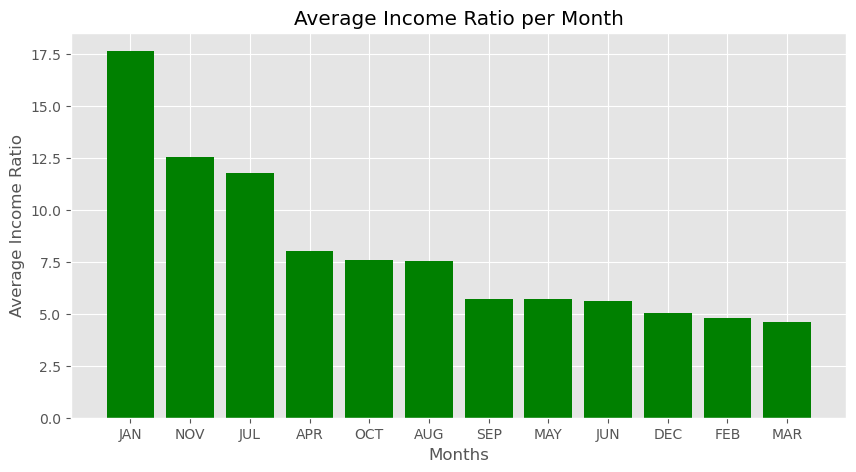

In [81]:
#plotting a bargraph for the months and average income ratio
fig, ax = plt.subplots(figsize = (10,5))

ax.bar(months_income.release_months, months_income.avg_incomeRatio, color = "green")
ax.set(xlabel = "Months", ylabel = "Average Income Ratio",
       title = "Average Income Ratio per Month");

Based on the analysis of the average income ratio for movies released in different months, it has been determined that the best months to release a movie, in terms of generating higher average income, are July, January, and November.

These findings suggest that movies released in July, January, and November tend to have a higher average income ratio compared to movies released in other months. This could be attributed to various factors such as holiday seasons, school vacations, specific genre releases, or other market dynamics during these months that contribute to increased movie attendance and revenue.

In [82]:
#Calculating the mean, median, standard deviation
print("mean: ", success_movies.production_budget.mean())
print("median: ", success_movies.production_budget.median())
print("standard dev: ", success_movies.production_budget.std())

mean:  42657307.10550695
median:  19000000.0
standard dev:  54278078.81716835


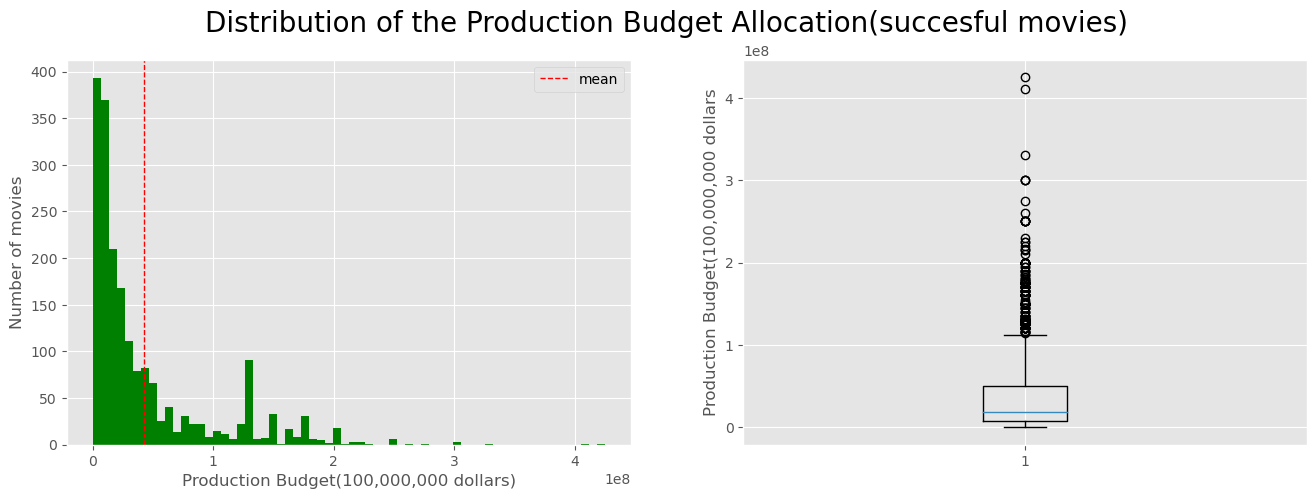

In [84]:
#Plotting the distribution of production budget
fig, ax = plt.subplots(figsize = (16,5), ncols=2)

ax[0].hist(success_movies.production_budget, bins="auto", color= "green")
ax[1].boxplot(success_movies.production_budget)

ax[0].axvline(success_movies.production_budget.mean(), c = "red", lw = 1, ls = "--")
ax[0].set(xlabel = "Production Budget(100,000,000 dollars)", ylabel = "Number of movies")
ax[1].set(ylabel = "Production Budget(100,000,000 dollars")

ax[0].legend(["mean"])

fig.suptitle("Distribution of the Production Budget Allocation(succesful movies)", fontsize = 20);

Based on the analysis of the movie budget data, it has been observed that the data is skewed due to a few movies with budget allocations exceeding 100,000,000. This upward skewness affects the mean value and may not accurately represent the typical budget allocation for successful movies.

In [88]:
#Correlation between production budget and income ratio
success_movies["production_budget"] = success_movies["production_budget"].astype(float)
success_movies["income_ratio"] = success_movies["income_ratio"].astype(float)
np.corrcoef(success_movies["production_budget"], success_movies["income_ratio"])[0][1]

-0.15420082076809352

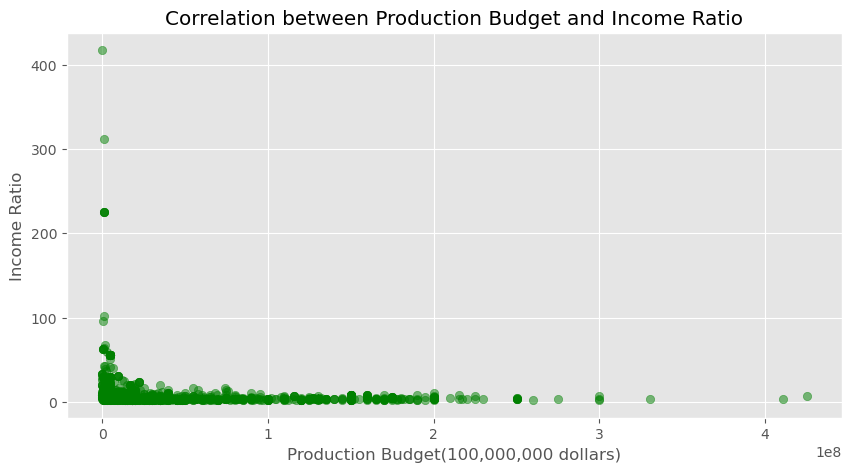

In [90]:
# A scatter plot matrix to display the relationship
fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(success_movies.production_budget, success_movies.income_ratio, color = "green",
           alpha=0.5)
ax.set(xlabel = "Production Budget(100,000,000 dollars)", ylabel = "Income Ratio",
       title = "Correlation between Production Budget and Income Ratio");


* The correlation coefficient (-0.1542) indicates a low negative correlat
* This means a slight inverse relationship and therefore the more the production budget the lesser the income ratio.

In [96]:
#Top three genres and their average spending
success_movies['genres'] = success_movies['genres'].fillna('Unknown')
drama_avg = success_movies.loc[success_movies.genres.str.contains("Drama")]["production_budget"].mean()
thriller_avg = success_movies.loc[success_movies.genres.str.contains("Thriller")]["production_budget"].mean()
comedy_avg = success_movies.loc[success_movies.genres.str.contains("Comedy")]["production_budget"].mean()

print("Drama Average Budget: ", drama_avg)
print("Thriller Average Budget: ", thriller_avg)
print("Comedy Average Budget: ", comedy_avg)

Drama Average Budget:  30350729.112662014
Thriller Average Budget:  34627787.18662953
Comedy Average Budget:  41977656.565656565


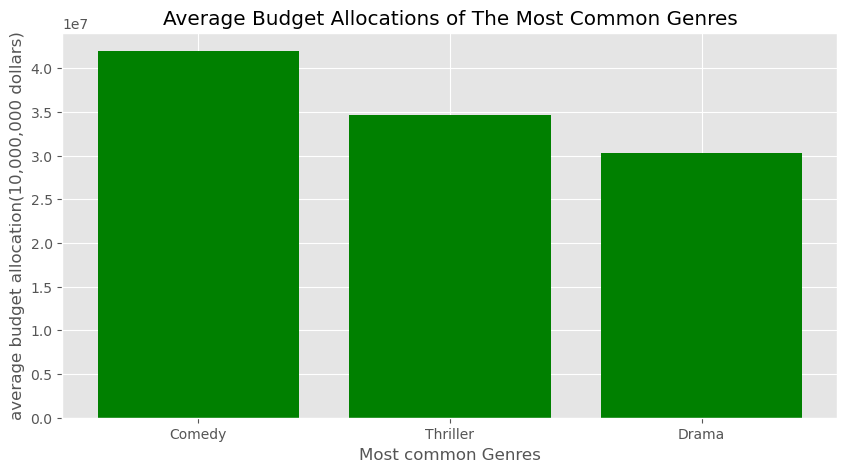

In [98]:
#Plotting a bar graph to represent average budgets of our top three genres
data = [comedy_avg, thriller_avg, drama_avg] 
labels = ["Comedy", "Thriller", "Drama"]

fig, ax = plt.subplots(figsize = (10,5))

ax.bar(labels, data, color = "green")
ax.set(xlabel = "Most common Genres", 
       ylabel = "average budget allocation(10,000,000 dollars)", 
       title = "Average Budget Allocations of The Most Common Genres");

From our analysis, we can conclude that comedy movies tend to have higher production budgets compared to drama movies, while drama movies are relatively cheaper to produce.

# RECOMMENDATIONS 

Based on the findings, I would highly recommend considering the following points:

1. Film Genres: Based on the analysis, the most common and successful genres in movies are DRAMA, THRILLER, and COMEDY. Among these, DRAMA stands out as it has a high income ratio and is relatively cheaper to produce. Additionally, genres like ACTION, ADVENTURE, HORROR, and MYSTERY have also performed well and are worth considering. The genre combination of ACTION, DRAMA, and ROMANCE has shown to have the highest income ratio.

2. Release Months: The success of a movie is greatly influenced by the release month. I recommend focusing on three months that have proven to   be the best in terms of income generation: JULY, JANUARY, and NOVEMBER. Among these, JULY has shown the highest income ratio.

3. Budget Allocation: To optimize the budget allocation for a successful movie, it is recommended to allocate within 24 million dollars. This range has been observed to be effective in achieving success in terms of income generated.

By considering these recommendations, you can increase the chances of creating successful movies with higher income ratios.